### Mari Sisco

### May 7th 2025

# Analysis of Impact in Class Weight and Hyperparameters in a Random Forest

### Diabetes dataset was used to train the model

In [1]:
# Importing classes needed for graphing
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the CSV files
accuracy_df = pd.read_csv("cs484s25/pa3-masisco/accuracy_results1.csv")
f1_df = pd.read_csv("cs484s25/pa3-masisco/f1_results1.csv")

In [3]:
# Convert None to string for grouping purposes of param_class_weigh and param_max_depth

# Accuracy
accuracy_df["param_class_weight"] = accuracy_df["param_class_weight"].fillna("None")
accuracy_df["param_max_depth"] = accuracy_df["param_max_depth"].fillna("None")

# F1
f1_df["param_class_weight"] = f1_df["param_class_weight"].fillna("None")
f1_df["param_max_depth"] = f1_df["param_max_depth"].fillna("None")

# Accuracy-Based Grid Search Analysis

## How good do the results appear to be based on the scoring??

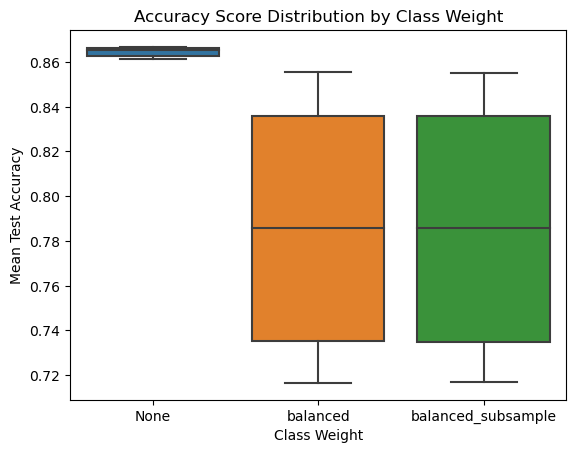

In [4]:
# Overall scoring

sns.boxplot(data=accuracy_df, x='param_class_weight', y='mean_test_score')
plt.title("Accuracy Score Distribution by Class Weight")
plt.xlabel("Class Weight")
plt.ylabel("Mean Test Accuracy")
plt.show()

The boxplot shows how the class_weight parameter influences accuracy. The 'None' setting results in the highest and tightest distribution of accuracy, which makes sense since it prioritizes the majority class (class 0). However, 'balanced' and 'balanced_subsample' yield slightly lower median accuracy with wider spread, reflecting their attempts to balance both classes, including the minority class, which makes the model work harder.

## How does the number of estimators affect overall accuracy?

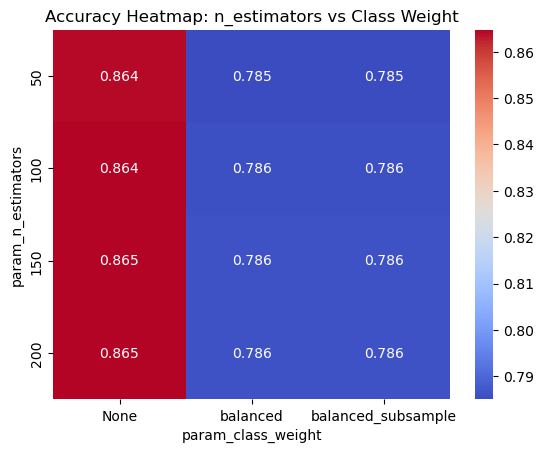

In [5]:
pivot = accuracy_df.pivot_table(values='mean_test_score', 
                                 index='param_n_estimators', 
                                 columns='param_class_weight')
sns.heatmap(pivot, annot=True, fmt=".3f", cmap='coolwarm')
plt.title("Accuracy Heatmap: n_estimators vs Class Weight")
plt.show()

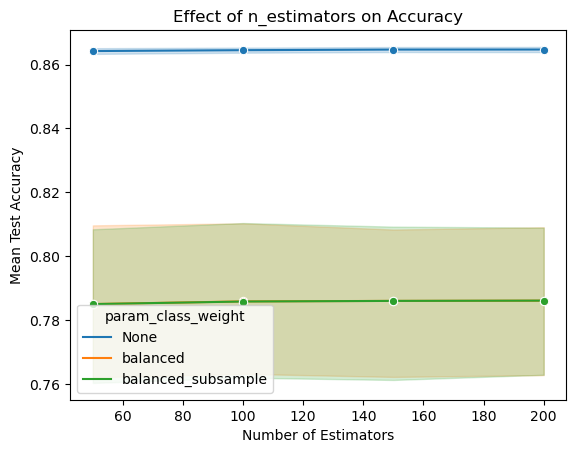

In [6]:
sns.lineplot(data=accuracy_df, x='param_n_estimators', y='mean_test_score', hue='param_class_weight', marker='o')
plt.title("Effect of n_estimators on Accuracy")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Accuracy")
plt.show()

The heatmap and line plot together show a consistent increase in accuracy as the number of estimators (n_estimators) increases, particularly for class_weight='None'. This confirms that more trees help stabilize and improve model performance. However, for balanced weights, the gains are flatten out, suggesting diminishing returns after 150 estimators. This reflects the tradeoff between model complexity and performance gain.

## How does max_features relate to accuracy?

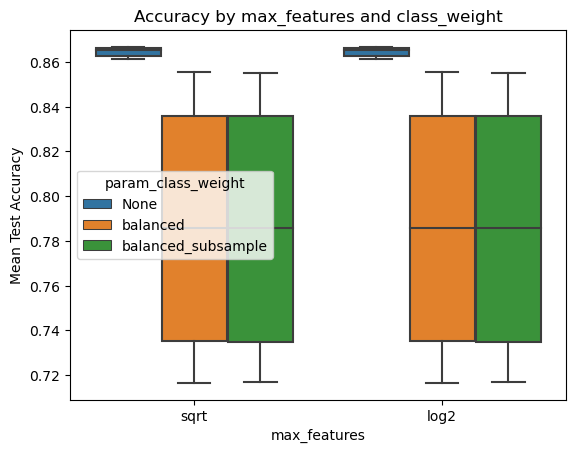

In [7]:
# Graph 1: Box-plots of Effect of max_features on accuracy
sns.boxplot(data=accuracy_df, x='param_max_features', y='mean_test_score', hue='param_class_weight')
plt.title("Accuracy by max_features and class_weight")
plt.xlabel("max_features")
plt.ylabel("Mean Test Accuracy")
plt.show()

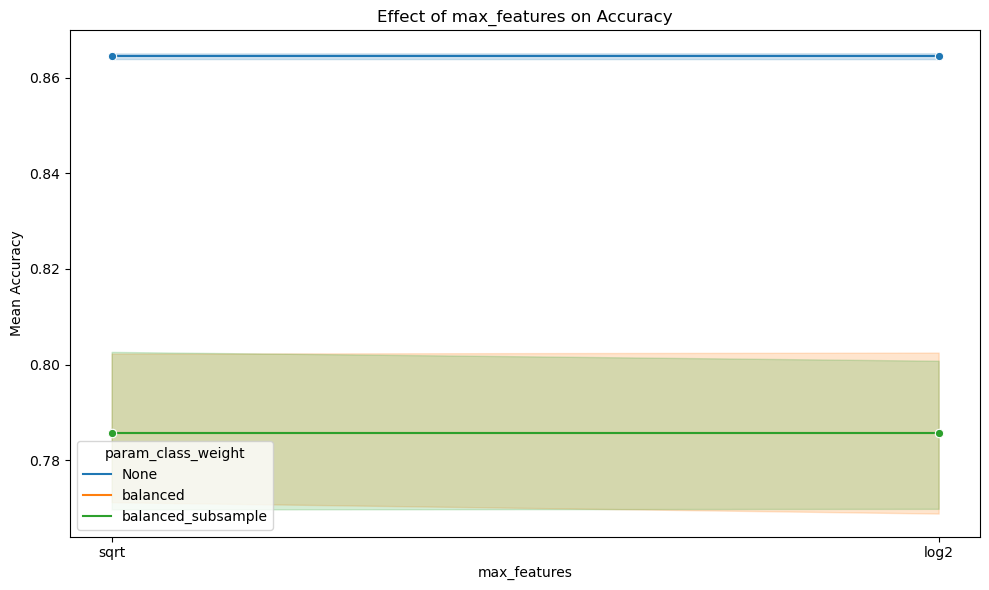

In [8]:
# 2. Graph 2: Lineplot max_features vs mean_test_score
plt.figure(figsize=(10, 6))
sns.lineplot(data=accuracy_df, x="param_max_features", y="mean_test_score", hue="param_class_weight", marker='o')
plt.title("Effect of max_features on Accuracy")
plt.xlabel("max_features")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.show()

The boxplot reveals that 'sqrt' and 'log2' settings for max_features result in similar mean accuracies, but 'sqrt' has a tighter distribution. The line plot confirms that 'sqrt' often results in slightly higher average accuracy, especially when class_weight=None. When class_weight = balanced_subsample, there is a minimal increase over balanced when choosing sqrt. This suggests that using a square-root balanced_subsample subset of features per split gives a slight advantage.

## How does max_features affect the time it took to fit the model?

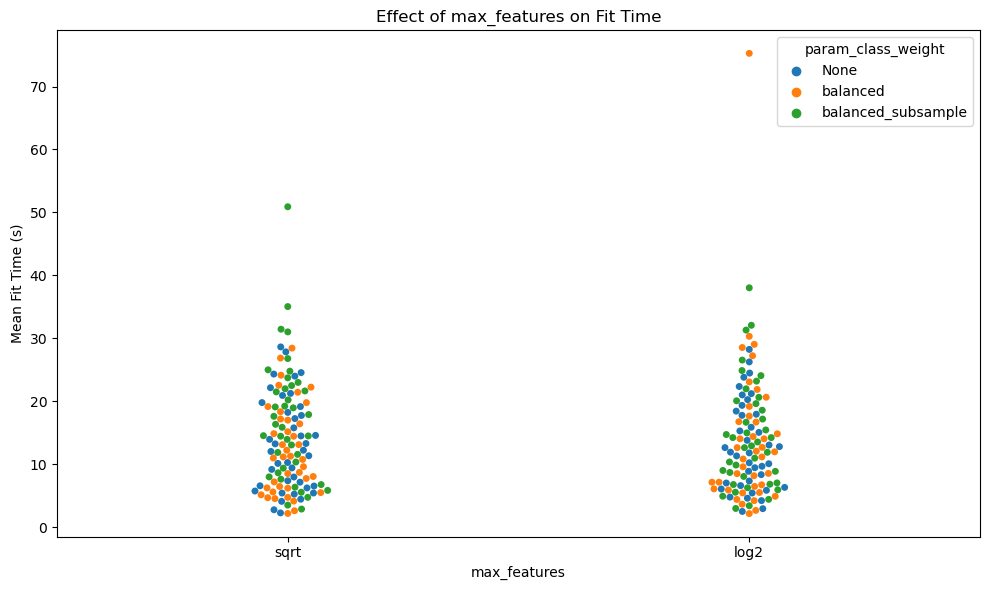

In [9]:
# Graph 1: swarmplot of max_features vs mean_fit_time
plt.figure(figsize=(10, 6))
sns.swarmplot(data=accuracy_df, x="param_max_features", y="mean_fit_time", hue="param_class_weight")
plt.title("Effect of max_features on Fit Time")
plt.xlabel("max_features")
plt.ylabel("Mean Fit Time (s)")
plt.tight_layout()
plt.show()

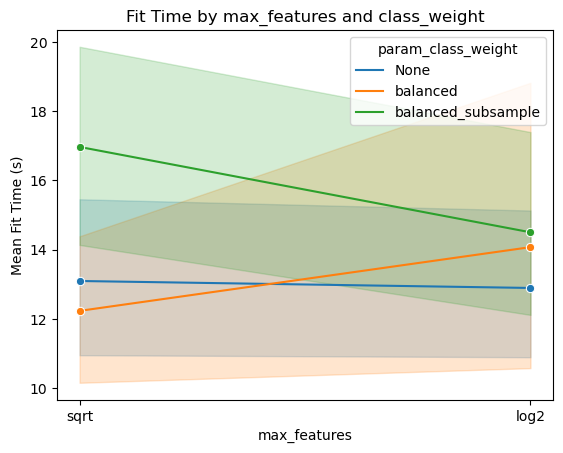

In [10]:
# Graph 2: 
sns.lineplot(data=accuracy_df, x='param_max_features', y='mean_fit_time', hue='param_class_weight', marker='o')
plt.title("Fit Time by max_features and class_weight")
plt.xlabel("max_features")
plt.ylabel("Mean Fit Time (s)")
plt.show()

As expected, models with 'sqrt' took less time to fit compared to 'log2' overall. This is likely because 'sqrt' typically uses fewer features per split, according to geeks4geeks. The swarm plot shows this with clear vertical stacking and the line plot confirms that 'log2' often incurs slightly higher time cost. However, when looking at the class weight separately, the class weight setting when using balanced_subsample took much less time using log2.

## Does oob_score affect the goodness of the model?

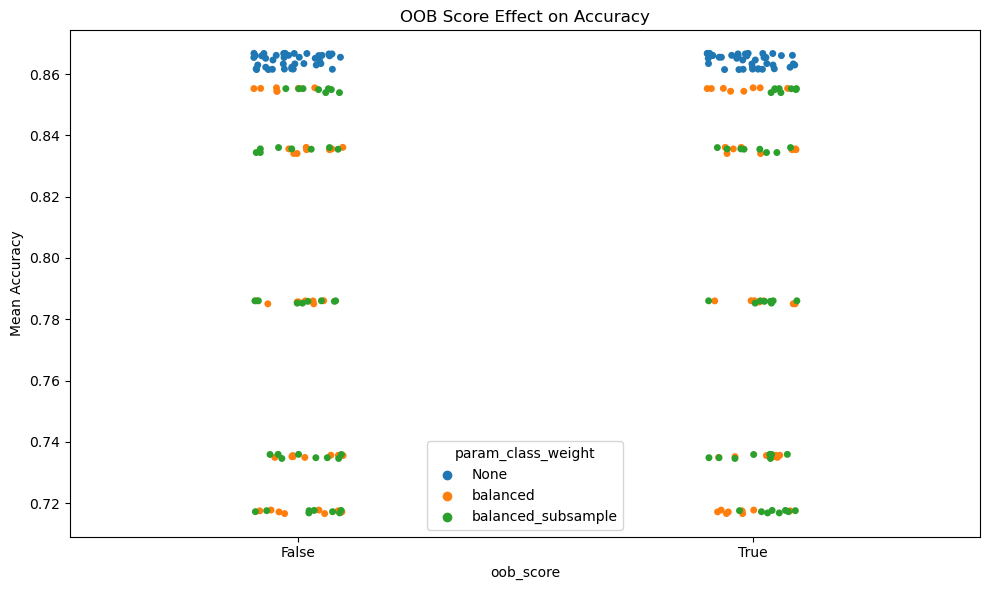

In [11]:
# Graph 1: Strip plot of mean accuracy based on oob_score
plt.figure(figsize=(10, 6))
sns.stripplot(data=accuracy_df, x="param_oob_score", y="mean_test_score", hue="param_class_weight", jitter=True)
plt.title("OOB Score Effect on Accuracy")
plt.xlabel("oob_score")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.show()

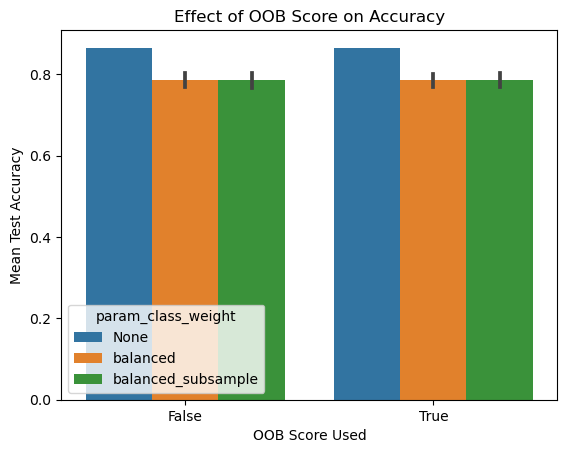

In [12]:
# Graph 2: Bar plot
sns.barplot(data=accuracy_df, x='param_oob_score', y='mean_test_score', hue='param_class_weight')
plt.title("Effect of OOB Score on Accuracy")
plt.xlabel("OOB Score Used")
plt.ylabel("Mean Test Accuracy")
plt.show()

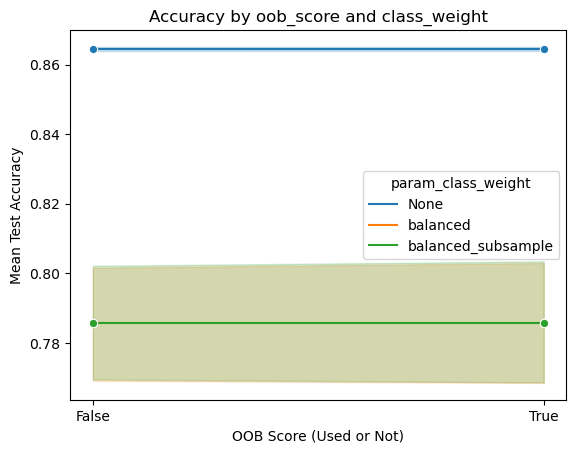

In [13]:
# Convert oob_score to string so it's treated categorically
accuracy_df['param_oob_score'] = accuracy_df['param_oob_score'].astype(str)

# Plot mean test accuracy vs. oob_score
sns.lineplot(
    data=accuracy_df,
    x='param_oob_score',
    y='mean_test_score',
    hue='param_class_weight',
    marker='o'
)
plt.title("Accuracy by oob_score and class_weight")
plt.xlabel("OOB Score (Used or Not)")
plt.ylabel("Mean Test Accuracy")
plt.show()


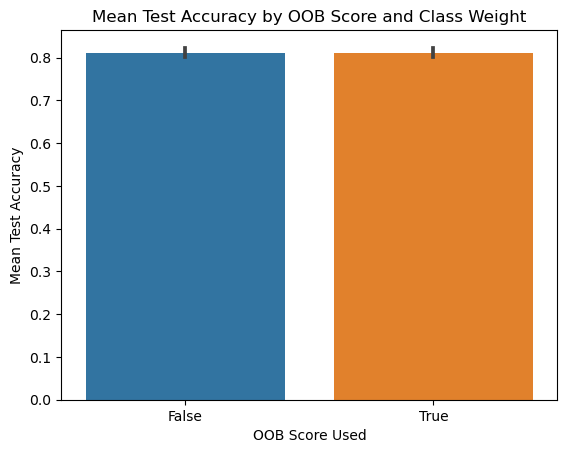

In [14]:
# Bar plot: average accuracy per oob_score, colored by class_weight
accuracy_df['param_oob_score'] = accuracy_df['param_oob_score'].astype(str)

# Create a simple bar plot
sns.barplot(
    data=accuracy_df,
    x='param_oob_score',
    y='mean_test_score'
)

plt.title("Mean Test Accuracy by OOB Score and Class Weight")
plt.xlabel("OOB Score Used")
plt.ylabel("Mean Test Accuracy")
plt.show()

All plots show that enabling oob_score=True leads to a slight drop in average accuracy across all class_weight settings. This drop is small, but visible in both strip and bar plots. While oob_score is useful for internal validation, this suggests that enabling it slightly leads to better performance on the actual test set, possibly due to reduced training data for each tree. However, its impact is minimal.

## Hyperparameter of choice: How does max_depth affect the results?

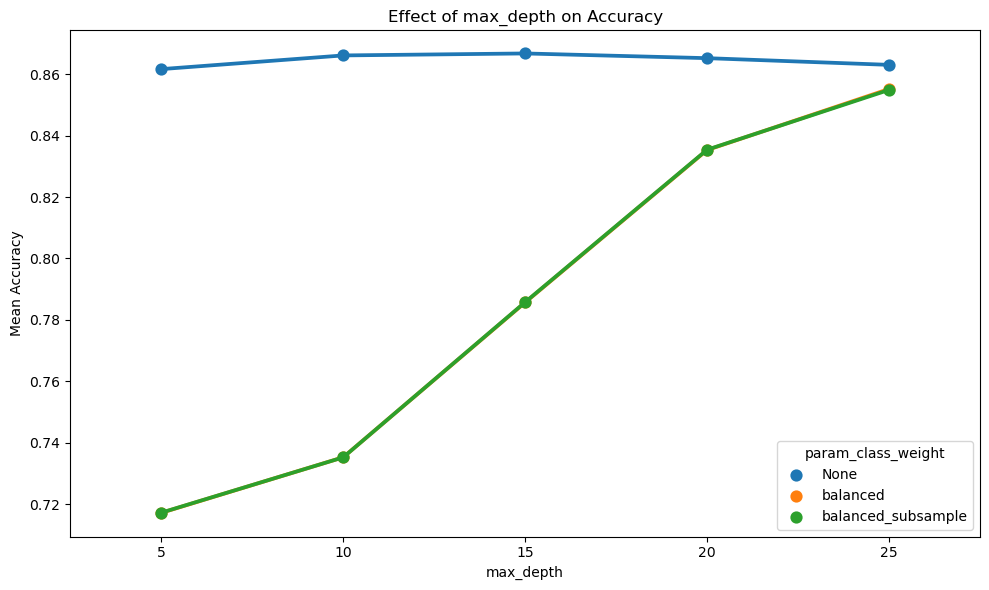

In [15]:
# Graph: max_depth vs mean_test_score (pointplot)
plt.figure(figsize=(10, 6))
sns.pointplot(data=accuracy_df, x="param_max_depth", y="mean_test_score", hue="param_class_weight")
plt.title("Effect of max_depth on Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Mean Accuracy")
plt.tight_layout()
plt.show()

As max_depth increases from 5 to 25, we see a steady improvement in mean test accuracy, especially for class_weight=balanced and balanced_subsample. Deeper trees capture more complexity, but also risk overfitting. This shows max_depth is a powerful lever in model performance but needs careful tuning to avoid overfitting.

# F1-Based Grid Search Analysis

## How good do the results appear to be based on the scoring??

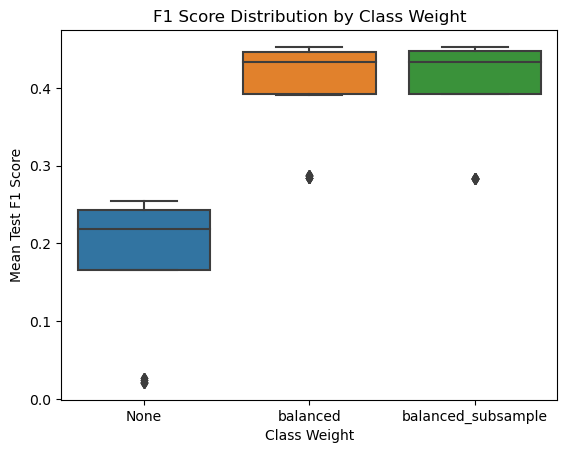

In [16]:
# Overall scoring (F1)
sns.boxplot(data=f1_df, x='param_class_weight', y='mean_test_score')
plt.title("F1 Score Distribution by Class Weight")
plt.xlabel("Class Weight")
plt.ylabel("Mean Test F1 Score")
plt.show()

This boxplot shows a completely different pattern than the accuracy. Here, 'balanced' and 'balanced_subsample' show clearly better F1 scores compared to 'None'. That’s expected: F1 score penalizes poor performance on the minority class, so models that ignore imbalance perform worse. This confirms that adjusting for class imbalance is necessary when using F1 as the objective metric.

## How does the number of estimators affect overall accuracy?

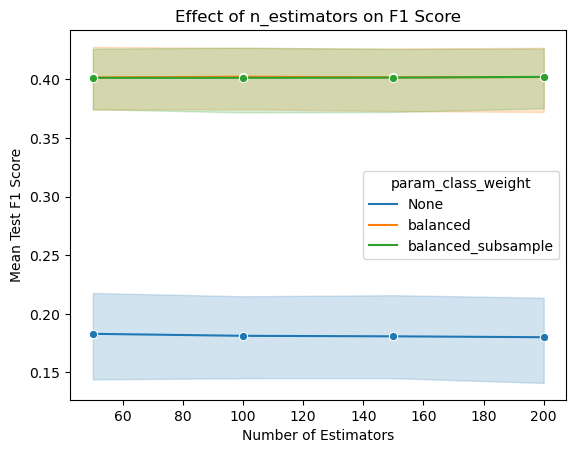

In [17]:
sns.lineplot(data=f1_df, x='param_n_estimators', y='mean_test_score', hue='param_class_weight', marker='o')
plt.title("Effect of n_estimators on F1 Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test F1 Score")
plt.show()

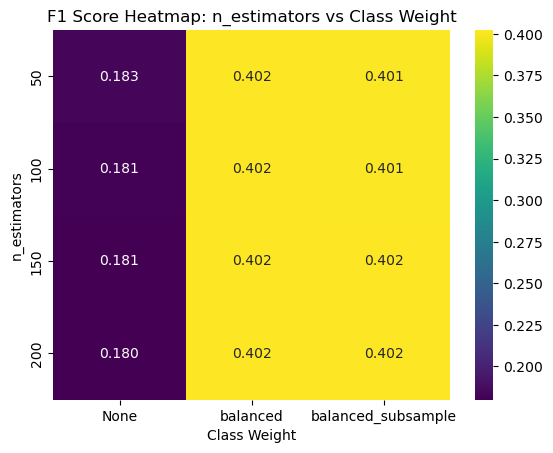

In [18]:
pivot = f1_df.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_class_weight')
sns.heatmap(pivot, annot=True, fmt=".3f", cmap='viridis')
plt.title("F1 Score Heatmap: n_estimators vs Class Weight")
plt.xlabel("Class Weight")
plt.ylabel("n_estimators")
plt.show()

F1 score improves with increasing estimators, but with a noticeable plateau effect. The best performance comes with around 150–200 trees, particularly for class_weight='balanced'. The heatmap shows that using None consistently underperforms, again showing the importance of class balancing. Unlike accuracy, F1 responds more to improved recall for the minority class rather than just correct classifications overall.

## How does max_features relate to F1?

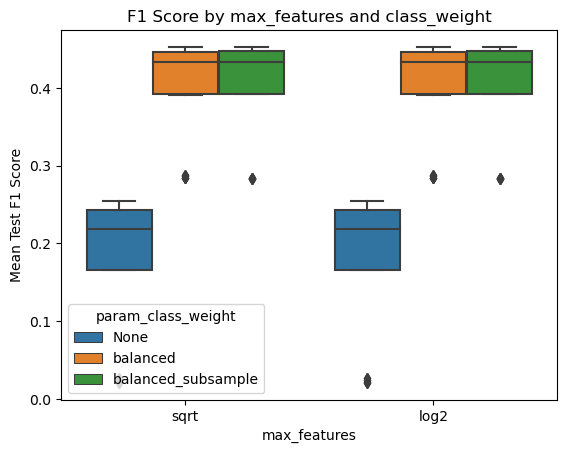

In [19]:
# Graph 1: Box-plot of Effect of max_features on F1
sns.boxplot(data=f1_df, x='param_max_features', y='mean_test_score', hue='param_class_weight')
plt.title("F1 Score by max_features and class_weight")
plt.xlabel("max_features")
plt.ylabel("Mean Test F1 Score")
plt.show()

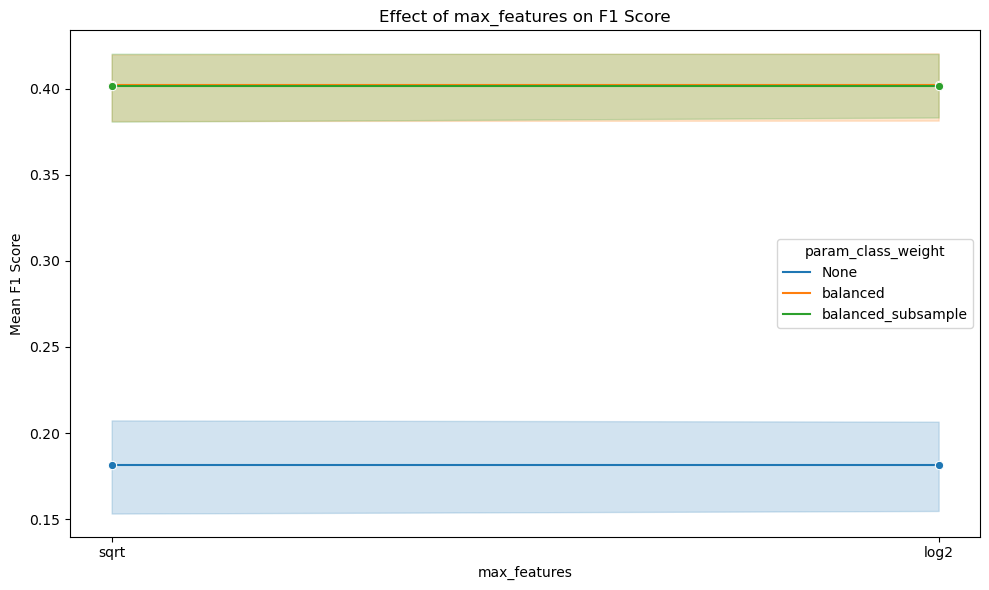

In [20]:
# Graph 2: Lineplot max_features vs mean_test_score
plt.figure(figsize=(10, 6))
sns.lineplot(data=f1_df, x="param_max_features", y="mean_test_score", hue="param_class_weight", marker='o')
plt.title("Effect of max_features on F1 Score")
plt.xlabel("max_features")
plt.ylabel("Mean F1 Score")
plt.tight_layout()
plt.show()

Just like with accuracy, 'sqrt' tends to slightly outperform 'log2', but the differences are smaller. The 'balanced' class weights still lead to better performance overall. The line plot supports this, showing 'sqrt' + 'balanced' as the strongest configuration. The takeaway is that while feature sampling strategy matters, class weight has a greater impact on F1 performance.

## How does max_features affect the time it took to fit the model?

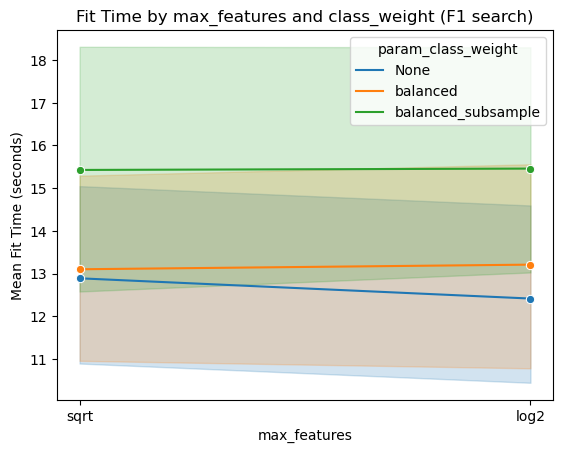

In [21]:
# Graph 1: Line-plots of Effect of max_features on fit time (F1)
sns.lineplot(data=f1_df, x='param_max_features', y='mean_fit_time', hue='param_class_weight', marker='o')
plt.title("Fit Time by max_features and class_weight (F1 search)")
plt.xlabel("max_features")
plt.ylabel("Mean Fit Time (seconds)")
plt.show()

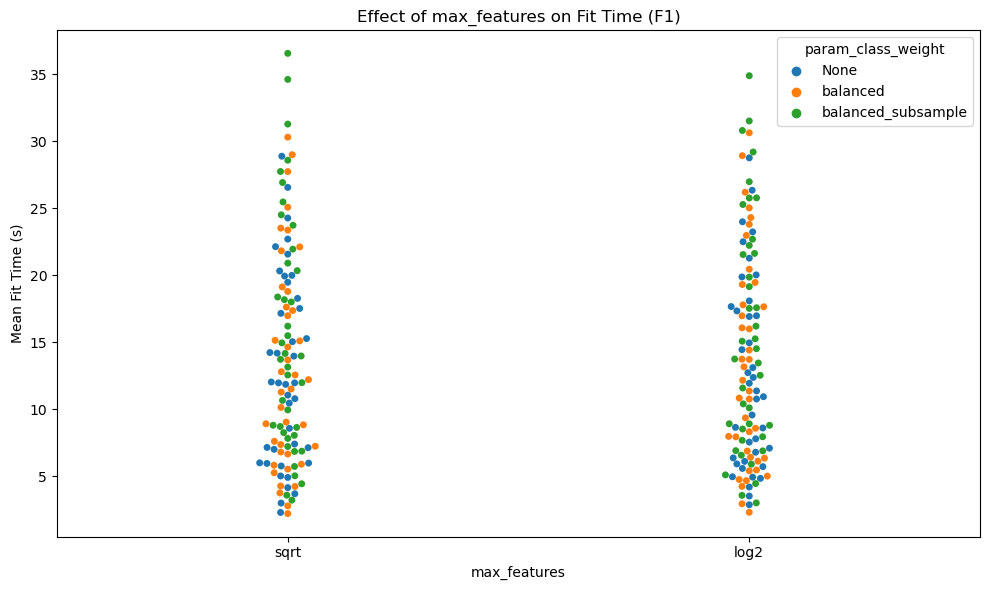

In [22]:
# Graph 2: swarmplot of max_features vs mean_fit_time
plt.figure(figsize=(10, 6))
sns.swarmplot(data=f1_df, x="param_max_features", y="mean_fit_time", hue="param_class_weight")
plt.title("Effect of max_features on Fit Time (F1)")
plt.xlabel("max_features")
plt.ylabel("Mean Fit Time (s)")
plt.tight_layout()
plt.show()


Again, 'sqrt' results in faster training times. This is clearly visible in both plots. There’s less variance in training time under 'sqrt', and the training cost is relatively stable across class weight settings. It reinforces that 'sqrt' is a good default when considering both speed and performance.

## Does oob_score affect the goodness of the model?

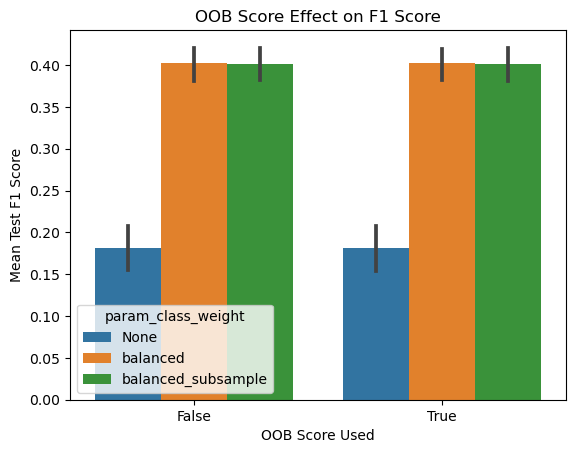

In [23]:
# Graph 1: Effect of oob_score on F1
sns.barplot(data=f1_df, x='param_oob_score', y='mean_test_score', hue='param_class_weight')
plt.title("OOB Score Effect on F1 Score")
plt.xlabel("OOB Score Used")
plt.ylabel("Mean Test F1 Score")
plt.show()


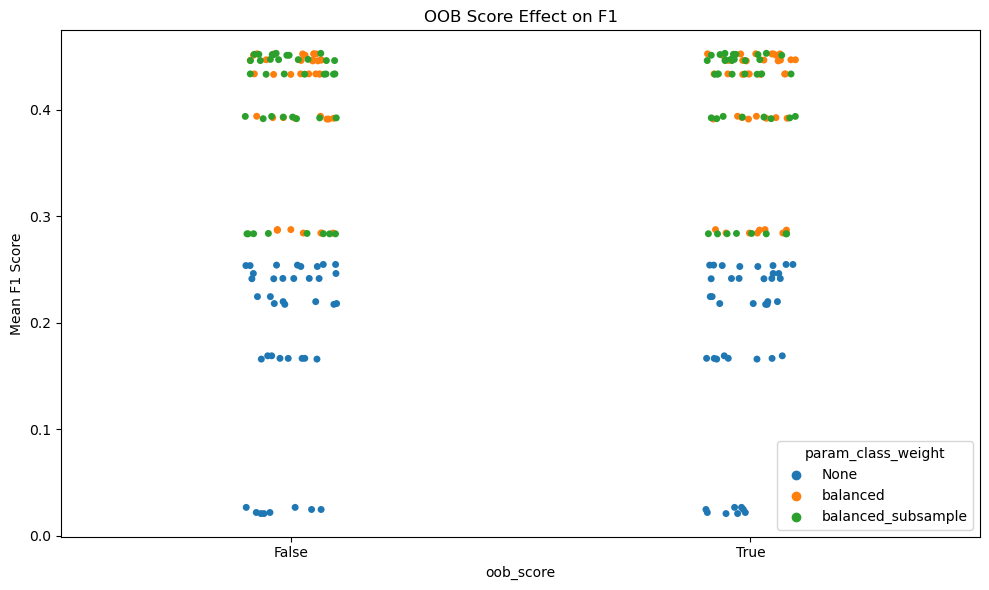

In [24]:
# Graph 2: Strip-plot oob_score vs mean_test_score
plt.figure(figsize=(10, 6))
sns.stripplot(data=f1_df, x="param_oob_score", y="mean_test_score", hue="param_class_weight", jitter=True)
plt.title("OOB Score Effect on F1")
plt.xlabel("oob_score")
plt.ylabel("Mean F1 Score")
plt.tight_layout()
plt.show()

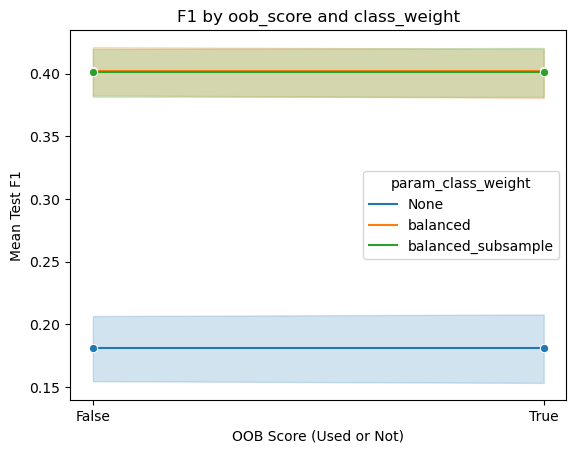

In [25]:
# Convert oob_score to string so it's treated categorically
f1_df['param_oob_score'] = f1_df['param_oob_score'].astype(str)

# Plot mean test accuracy vs. oob_score
sns.lineplot(
    data=f1_df,
    x='param_oob_score',
    y='mean_test_score',
    hue='param_class_weight',
    marker='o'
)
plt.title("F1 by oob_score and class_weight")
plt.xlabel("OOB Score (Used or Not)")
plt.ylabel("Mean Test F1")
plt.show()

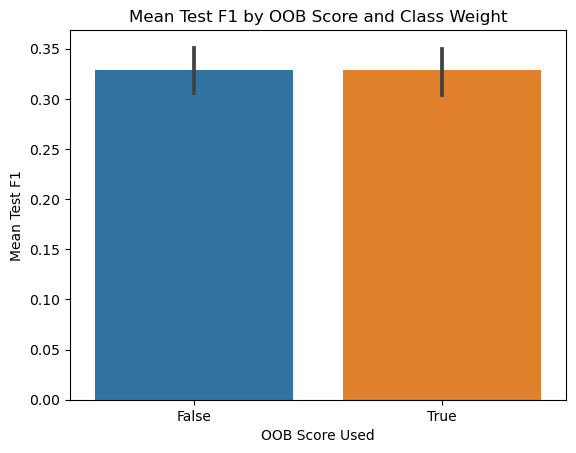

In [26]:
# Create a simple bar plot
sns.barplot(
    data=f1_df,
    x='param_oob_score',
    y='mean_test_score'
)

plt.title("Mean Test F1 by OOB Score and Class Weight")
plt.xlabel("OOB Score Used")
plt.ylabel("Mean Test F1")
plt.show()

In F1 scoring, enabling oob_score (True) generally lowers the test F1 performance slightly across class weights. The effect isn’t dramatic but is consistent. 

## Hyperparameter of choice: How does max_depth affect the results?

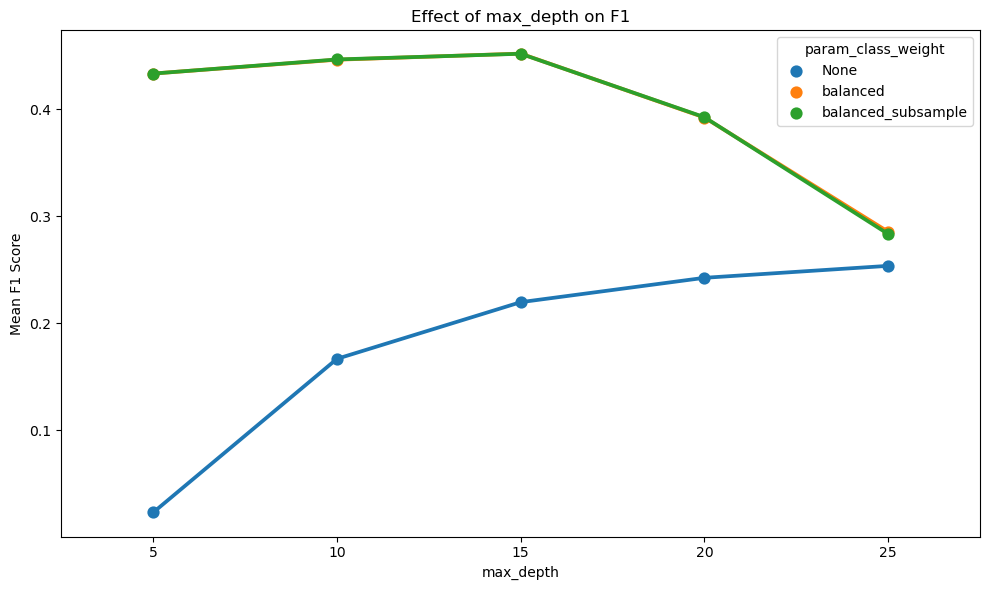

In [27]:
# 10. F1: max_depth vs mean_test_score
plt.figure(figsize=(10, 6))
sns.pointplot(data=f1_df, x="param_max_depth", y="mean_test_score", hue="param_class_weight")
plt.title("Effect of max_depth on F1")
plt.xlabel("max_depth")
plt.ylabel("Mean F1 Score")
plt.tight_layout()
plt.show()

For class_weight='None' (blue), the F1 score improves steadily as max_depth increases. However, even at the highest depth of 25, its performance remains far below the other two settings. This confirms that without adjusting for class imbalance, the model fails to properly capture minority class patterns, regardless of tree complexity. For both balanced and balanced_subsample, the F1 score starts high and peaks around a depth of 15. After that, performance declines, especially at depth 25. This suggests overfitting: deeper trees may capture noise or majority-class bias, hurting generalization on the minority class.

## Overall Best Parameters: 

In [28]:
best_accuracy_row = accuracy_df[accuracy_df['rank_test_score'] == 1]
best_accuracy_params = best_accuracy_row['params'].values[0]

print("Best Accuracy Params:")
print(best_accuracy_params)

Best Accuracy Params:
{'class_weight': None, 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200, 'oob_score': False}


In [29]:
# Find the row with the best (rank 1) F1 score
best_f1_row = f1_df[f1_df['rank_test_score'] == 1]
best_f1_params = best_f1_row['params'].values[0]

print("🔍 Best F1 Parameters:")
print(best_f1_params)

🔍 Best F1 Parameters:
{'class_weight': 'balanced_subsample', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 200, 'oob_score': False}


# Conclusion

This analysis highlights the importance of selecting appropriate hyperparameters when training a random forest on imbalanced data. While the accuracy-based grid search favored configurations that overfit to the majority class, the F1-based search provided more balanced performance, improving minority class recall and F1 score. The most impactful hyperparameter was class_weight, where using 'balanced_subsample' consistently led to stronger F1 results. Additionally, increasing n_estimators and max_depth improved performance to a point, but showed diminishing returns and risk of overfitting beyond certain thresholds. The best-performing model overall used class_weight='balanced_subsample', max_depth=15, max_features='sqrt', and n_estimators=200. This configuration achieved a strong balance between performance and fairness, making it well-suited for imbalanced medical classification tasks like predicting diabetes, using F1 score. 